Analyses pre-registered for MTurk version of study 3b (reported in the submitted manuscript as study 3b).

Pre-registration: https://osf.io/de935

In [26]:
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.stats.api as sms
from pyspan.config import *
from pyspan.plurals.analysis import *
assert mturk

# Demographics

In [2]:
print len(politics.loc[politics.ident == "REPUBLICAN"]), \
      len(politics.loc[politics.ident == "DEMOCRAT"])

145 135


In [3]:
demographic_info(politics.loc[politics.ident == "REPUBLICAN"])

Age: 41.8206896552 (SE = 0.988907296148)
Gender: [('Female', 86), ('Male', 59)]


In [4]:
demographic_info(politics.loc[politics.ident == "DEMOCRAT"])

Age: 36.5481481481 (SE = 0.943027042055)
Gender: [('Female', 73), ('Male', 61), ('Other (please specify)', 1)]


# Main result

### Between subjects

#### 60% item selection threshold

##### Logistic regression

Selection of positive word ~ Participant's political affiliation + Condition + Participant's political affiliation * Condition + Dummy indicating whether or not this was the first survey the participant took (including participant-level effects)

In [5]:
pdummied, Y = dummy(politics, [ "REPUBLICAN", "DEMOCRAT" ],
                    np.stack((positive60, negative60)), 
                    ixs = (words.index + 100).values)
X, Y = df_to_matrix(pdummied, Y, ixs = (words.index + 100).values,
                    columns = { 0: "id", 1: "condition", 2: (0,1), 
                                3: "order" })

In [6]:
logit = SparseLR(Y, X); print logit.coef[:4]; logit.auc

/Users/sabinasloman/.pyenv/versions/2.7.17/envs/lop_env/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.         0.         0.38625545 0.        ]


0.6131082248262879

##### t-tests

In [7]:
psummary = politics[["Condition", "ident"]]
dat = politics[(words.index+100).values].values
props = np.apply_along_axis(get_prop, 1, dat, positive60, 
                            negative60)
psummary["ppos"] = props
assert psummary.values.shape == (len(politics), 3)

/Users/sabinasloman/.pyenv/versions/2.7.17/envs/lop_env/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


For participants in the Democrat condition, the difference in means mean(% positive words chosen amongst Democrats) - mean(% positive words chosen amongst Republicans) > 0.

In [8]:
a = psummary.loc[(psummary["Condition"] == "DEMOCRAT") & (psummary["ident"] == "DEMOCRAT")]["ppos"]
b = psummary.loc[(psummary["Condition"] == "DEMOCRAT") & (psummary["ident"] == "REPUBLICAN")]["ppos"]
stats.ttest_ind(a, b, equal_var = False)

Ttest_indResult(statistic=7.085419454446693, pvalue=6.227495928028679e-11)

For participants in the Republican condition, the difference in means mean(% positive words chosen amongst Republicans) - mean(% positive words chosen amongst Democrats) > 0.

In [9]:
a = psummary.loc[(psummary["Condition"] == "REPUBLICAN") & (psummary["ident"] == "REPUBLICAN")]["ppos"].values
b = psummary.loc[(psummary["Condition"] == "REPUBLICAN") & (psummary["ident"] == "DEMOCRAT")]["ppos"].values
stats.ttest_ind(a, b, equal_var = False)

Ttest_indResult(statistic=7.363518171515539, pvalue=1.7718925447246454e-11)

The difference in means mean(% positive words chosen amongst those whose condition matched their political identity) - mean(% positive words chosen amongst those whose condition didn't match their political identity) > 0

In [10]:
a = psummary.loc[psummary["Condition"] == psummary["ident"]]["ppos"].values
b = psummary.loc[psummary["Condition"] != psummary["ident"]]["ppos"].values
stats.ttest_ind(a, b, equal_var = False)

Ttest_indResult(statistic=10.193431737375185, pvalue=6.873022204737116e-21)

#### 80% item selection threshold

##### Logistic regression

In [11]:
pdummied, Y = dummy(politics, [ "REPUBLICAN", "DEMOCRAT" ],
                    np.stack((positive80, negative80)), 
                    ixs = (words.index + 100).values)
X, Y = df_to_matrix(pdummied, Y, ixs = (words.index + 100).values,
                    columns = { 0: "id", 1: "condition", 2: (0,1), 
                                3: "order" })

In [12]:
logit = SparseLR(Y, X); print logit.coef[:4]; logit.auc

[0.         0.         0.42830992 0.        ]


0.643413392144372

##### t-tests

In [13]:
psummary = politics[["Condition", "ident"]]
dat = politics[(words.index+100).values].values
props = np.apply_along_axis(get_prop, 1, dat, positive80, 
                            negative80)
psummary["ppos"] = props
assert psummary.values.shape == (len(politics), 3)

/Users/sabinasloman/.pyenv/versions/2.7.17/envs/lop_env/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


For participants in the Democrat condition, the difference in means mean(% positive words chosen amongst Democrats) - mean(% positive words chosen amongst Republicans) > 0.

In [14]:
a = psummary.loc[(psummary["Condition"] == "DEMOCRAT") & (psummary["ident"] == "DEMOCRAT")]["ppos"].values
b = psummary.loc[(psummary["Condition"] == "DEMOCRAT") & (psummary["ident"] == "REPUBLICAN")]["ppos"].values
stats.ttest_ind(a, b, equal_var = False)

Ttest_indResult(statistic=9.12168735747319, pvalue=8.120358139256662e-16)

For participants in the Republican condition, the difference in means mean(% positive words chosen amongst Republicans) - mean(% positive words chosen amongst Democrats) > 0.

In [15]:
a = psummary.loc[(psummary["Condition"] == "REPUBLICAN") & (psummary["ident"] == "REPUBLICAN")]["ppos"].values
b = psummary.loc[(psummary["Condition"] == "REPUBLICAN") & (psummary["ident"] == "DEMOCRAT")]["ppos"].values
stats.ttest_ind(a, b, equal_var = False)

Ttest_indResult(statistic=7.722958007346269, pvalue=2.4314774116835523e-12)

The difference in means mean(% positive words chosen amongst those whose condition matched their political identity) - mean(% positive words chosen amongst those whose condition didn't match their political identity) > 0

In [16]:
a = psummary.loc[psummary["Condition"] == psummary["ident"]]["ppos"].values
b = psummary.loc[psummary["Condition"] != psummary["ident"]]["ppos"].values
stats.ttest_ind(a, b, equal_var = False)

Ttest_indResult(statistic=11.838367295561595, pvalue=2.372498696147569e-26)

### Within-subjects

#### Logistic regression

In [17]:
# Positive
ixs = (words.index[:10] + 100).values
# Negative
ixs = (words.index[10:20] + 100).values
# Neutral
ixs = (words.index[20:30] + 100).values
# All non-distractor items
ixs = (words.index[:30] + 100).values

In [18]:
pdummied, Y = dummy(politics, [ "REPUBLICAN", "DEMOCRAT" ],
                    within = True, 
                    ixs = ixs)
X, Y = df_to_matrix(pdummied, Y, ixs = ixs,
                    columns = { 0: "id", 1: "condition", 2: (0,1), 
                                3: "order"
                              })

In [19]:
logit = SparseLR(Y, X); print logit.coef[:4]; logit.auc

[0.        0.        0.3268107 0.       ]


0.60170067183874

#### t-tests

In [20]:
psummary_ws = summarize(pdummied, ixs)

/Users/sabinasloman/Box/LoP/pyspan/pyspan/plurals/analysis.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  summary["p"] = props


For participants in the Republican condition, the difference in means mean(% positive words chosen amongst Republicans) - mean(% positive words chosen amongst Democrats) > 0.

In [21]:
a = psummary_ws.loc[(psummary_ws["Condition"] == 1) & (psummary_ws["ident"] == 1)]["p"].values
b = psummary_ws.loc[(psummary_ws["Condition"] == 1) & (psummary_ws["ident"] == 0)]["p"].values
stats.ttest_ind(a, b, equal_var = False)

Ttest_indResult(statistic=6.918258148863724, pvalue=1.8129327803258856e-10)

For participants in the Democrat condition, the difference in means mean(% positive words chosen amongst Democrats) - mean(% positive words chosen amongst Republicans) > 0.

In [22]:
a = psummary_ws.loc[(psummary_ws["Condition"] == 0) & (psummary_ws["ident"] == 0)]["p"].values
b = psummary_ws.loc[(psummary_ws["Condition"] == 0) & (psummary_ws["ident"] == 1)]["p"].values
stats.ttest_ind(a, b, equal_var = False)

Ttest_indResult(statistic=5.211362095319887, pvalue=6.59335529783023e-07)

The difference in means mean(% positive words chosen amongst those whose condition matched their political identity) - mean(% positive words chosen amongst those whose condition didn't match their political identity) > 0

In [23]:
a = psummary_ws.loc[psummary_ws["Condition"] == psummary_ws["ident"]]["p"].values
b = psummary_ws.loc[psummary_ws["Condition"] != psummary_ws["ident"]]["p"].values

In [24]:
np.mean(a), stats.sem(a), np.mean(b), stats.sem(b)

(0.6331229272153547,
 0.0169888389862318,
 0.4305007953210964,
 0.01664723471595297)

In [27]:
dsw_a = sms.DescrStatsW(a)
dsw_b = sms.DescrStatsW(b)
cm = sms.CompareMeans(dsw_a, dsw_b)
cm.ttest_ind(usevar="unequal", alternative = "larger")

(8.518716925967274, 5.192912115605651e-16, 277.66563153721523)

Calculate difference in means and a confidence region of +- 2 SEs.

In [28]:
delta = dsw_a.mean - dsw_b.mean
se_delta = cm.std_meandiff_separatevar
print(delta, delta - 2*se_delta, delta + 2*se_delta)

(0.20262213189425826, 0.15505108718056126, 0.25019317660795526)


## Figure 2b

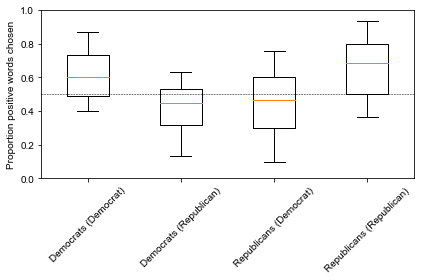

In [29]:
fig, ax = plt.subplots(1)
x_dd = psummary_ws.loc[(psummary_ws["Condition"] == 0) & (psummary_ws["ident"] == 0)]["p"]
x_dr = psummary_ws.loc[(psummary_ws["Condition"] == 1) & (psummary_ws["ident"] == 0)]["p"]
x_rd = psummary_ws.loc[(psummary_ws["Condition"] == 0) & (psummary_ws["ident"] == 1)]["p"]
x_rr = psummary_ws.loc[(psummary_ws["Condition"] == 1) & (psummary_ws["ident"] == 1)]["p"]
ax.boxplot([ x_dd, x_dr, x_rd, x_rr ], whis = [5,95], sym = "")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(*xlim)
ax.set_ylim(0,1)
ax.plot(xlim, [.5,.5], color = "k", linestyle = "--", linewidth = .5)
ax.set_ylabel("Proportion positive words chosen")
ax.set_xticklabels([ "Democrats (Democrat)", "Democrats (Republican)",
                     "Republicans (Democrat)", 
                     "Republicans (Republican)" ], rotation = 45)
plt.tight_layout()

# Study 3b revisited: Controlling for construal level

##### t-tests

Hypothesis: mean(% abstract words chosen amongst those whose condition matched their political identity) - mean(% concrete words chosen amongst those whose condition didn't match their political identity) < 0

60\% consensus threshold

In [30]:
psummary = politics[["Condition", "ident"]]
dat = politics[(words.index+100).values].values
props = np.apply_along_axis(get_prop, 1, dat, abstract60, 
                            concrete60)
psummary["ppos"] = props
assert psummary.values.shape == (len(politics), 3)

/Users/sabinasloman/.pyenv/versions/2.7.17/envs/lop_env/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [31]:
stats.ttest_ind(psummary.loc[psummary["Condition"] == psummary["ident"]]["ppos"],
                psummary.loc[psummary["Condition"] != psummary["ident"]]["ppos"],
                equal_var = False)

Ttest_indResult(statistic=-0.0895512052554193, pvalue=0.9287093387653393)

Skip the 80\% consensus threshold, because no words meet this threshold on judgments of construal level.

Within-subjects

In [32]:
pdummied, Y = dummy(politics, [ "REPUBLICAN", "DEMOCRAT" ],
                    within = True, 
                    ixs = (words.index + 100).values, df2 = cl,
                    conditions = [ "ABSTRACT", "CONCRETE" ])
psummary_ws = summarize(pdummied, (words.index+100).values)

In [33]:
a = psummary_ws.loc[psummary_ws["Condition"] != psummary_ws["ident"]]["p"]
b = psummary_ws.loc[psummary_ws["Condition"] == psummary_ws["ident"]]["p"]

In [34]:
dsw_a = sms.DescrStatsW(a)
dsw_b = sms.DescrStatsW(b)
cm = sms.CompareMeans(dsw_a, dsw_b)
cm.ttest_ind(usevar="unequal", alternative = "larger")

(0.050565822192256464, 0.47985398660489686, 276.7544615708162)

Calculate the difference in means and a confidence region of +- 2 SEs.

In [35]:
delta = dsw_a.mean - dsw_b.mean
se_delta = cm.std_meandiff_separatevar
print(delta, delta - 2*se_delta, delta + 2*se_delta)

(0.001367304695454541, -0.05271288766277144, 0.055447497053680524)


##### Logistic regression

Selection of positive word ~ Participant's political identity + Condition + Participant's political identity * Condition + Selection of abstract word + Participant's political identity * Condition * Selection of abstract word + Dummy indicating whether or not the participant took the politics survey before the valence survey (including participant-level effects)

In [34]:
ixs = (words.index + 100).values
assert np.array_equal(politics.index, valence.index)
assert np.array_equal(valence.index, cl.index)
pdummied, Y = dummy(politics, [ "REPUBLICAN", "DEMOCRAT" ],
                    within = True, ixs = ixs)
pdummied_cl, Y_cl = dummy(politics, [ "REPUBLICAN", "DEMOCRAT" ],
                          within = True, ixs = ixs, df2 = cl, 
                          conditions = ["ABSTRACT", "CONCRETE"])
vdummied, Y_v = dummy(valence, ["POSITIVE", "NEGATIVE"], within = True,
                      ixs = ixs, df2 = cl,
                      conditions = ["ABSTRACT", "CONCRETE"])

In [35]:
X, Y = df_to_matrix(pdummied, Y, ixs = ixs,
                    columns = { 0: "id", 1: "condition", 2: (0,1), 
                                3: (0, 0, lambda y, x: Y_cl), 4: (0, 0, lambda y, x: -1000),
                                5: "order", 
                                6: (0, 0, lambda y, x: np.repeat(pdummied_cl["order"], len(ixs))),
                                7: (0, 0, lambda y, x: np.repeat(vdummied["order"], len(ixs)))
                              })

In [36]:
X[X[:,0] == 0,0] = -1
X[X[:,1] == 0,1] = -1
X[X[:,3] == 0,3] = -1
X[:,4] = X[:,0] * X[:,1] * X[:,3]

In [37]:
logit = SparseLR(Y, X)
print logit.coef[:8], logit.score, len(Y)

[0.         0.         0.33819066 0.01078587 0.         0.
 0.03895514 0.        ] 0.5987671108693682 11031
